# Anemia types Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('diagnosed_cbc_data_v4.csv')

In [3]:
df.head()

WBC  LYMp  NEUTp  LYMn  NEUTn   RBC  HGB    HCT   MCV   MCH  MCHC    PLT  \
0  10.0  43.2   50.1   4.3    5.0  2.77  7.3   24.2  87.7  26.3  30.1  189.0   
1  10.0  42.4   52.3   4.2    5.3  2.84  7.3   25.0  88.2  25.7  20.2  180.0   
2   7.2  30.7   60.7   2.2    4.4  3.97  9.0   30.5  77.0  22.6  29.5  148.0   
3   6.0  30.2   63.5   1.8    3.8  4.22  3.8   32.8  77.9  23.2  29.8  143.0   
4   4.2  39.1   53.7   1.6    2.3  3.93  0.4  316.0  80.6  23.9  29.7  236.0   

    PDW   PCT                      Diagnosis  
0  12.5  0.17  Normocytic hypochromic anemia  
1  12.5  0.16  Normocytic hypochromic anemia  
2  14.3  0.14         Iron deficiency anemia  
3  11.3  0.12         Iron deficiency anemia  
4  12.8  0.22  Normocytic hypochromic anemia

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [5]:
df.describe().T

count        mean         std    min        25%         50%  \
WBC    1281.0    7.862717    3.564466   0.80    6.00000    7.400000   
LYMp   1281.0   25.845000    7.038728   6.20   25.84500   25.845000   
NEUTp  1281.0   77.511000  147.746273   0.70   71.10000   77.511000   
LYMn   1281.0    1.880760    1.335689   0.20    1.88076    1.880760   
NEUTn  1281.0    5.140940    2.872294   0.50    5.10000    5.140940   
RBC    1281.0    4.708267    2.817200   1.36    4.19000    4.600000   
HGB    1281.0   12.184551    3.812897 -10.00   10.80000   12.300000   
HCT    1281.0   46.152600  104.886100   2.00   39.20000   46.152600   
MCV    1281.0   85.793919   27.177663 -79.30   81.20000   86.600000   
MCH    1281.0   32.084840  111.170756  10.90   25.50000   27.800000   
MCHC   1281.0   31.739149    3.300352  11.50   30.60000   32.000000   
PLT    1281.0  229.981421   93.019336  10.00  157.00000  213.000000   
PDW    1281.0   14.312512    3.005079   8.40   13.30000   14.312512   
PCT    1281.0    0.260280    0.685351   0.01    0.17000    0.260280   

             75%     max  
WBC      8.68000    45.7  
LYMp    25.84500    91.4  
NEUTp   77.51100  5317.0  
LYMn     1.88076    41.8  
NEUTn    5.14094    79.0  
RBC      5.10000    90.8  
HGB     13.50000    87.1  
HCT     46.15260  3715.0  
MCV     90.20000   990.0  
MCH     29.60000  3117.0  
MCHC    32.90000    92.8  
PLT    293.00000   660.0  
PDW     14.70000    97.0  
PCT      0.26028    13.6

In [6]:
cbc_full_names = [
    'WBC', 'Lymphocyte Percentage', 'Neutrophil Percentage',
    'Lymphocyte Number', 'Neutrophil Number', 'RBC',
    'Hemoglobin', 'Hematocrit', 'Mean Corpuscular Volume',
    'Mean Corpuscular Hemoglobin', 'Mean Corpuscular Hemoglobin Concentration',
    'Platelet Count', 'Platelet Distribution Width', 'Procalcitonin'
]
column_mapping = dict(zip(df.columns, cbc_full_names))
df.rename(column_mapping,axis=1,inplace=True)

### *Labeling The Diagnosis Values to Numeric Values*

In [7]:
conditions = df['Diagnosis'].value_counts().index.to_list()

In [8]:
conditions = {condition:i for i,condition in enumerate(conditions)}
conditions

{'Healthy': 0,
 'Normocytic hypochromic anemia': 1,
 'Normocytic normochromic anemia': 2,
 'Iron deficiency anemia': 3,
 'Thrombocytopenia': 4,
 'Other microcytic anemia': 5,
 'Leukemia': 6,
 'Macrocytic anemia': 7,
 'Leukemia with thrombocytopenia': 8}

In [9]:
df['Diagnosis'] = df['Diagnosis'].map(conditions)

In [10]:
df.isnull().sum()

WBC                                          0
Lymphocyte Percentage                        0
Neutrophil Percentage                        0
Lymphocyte Number                            0
Neutrophil Number                            0
RBC                                          0
Hemoglobin                                   0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Platelet Count                               0
Platelet Distribution Width                  0
Procalcitonin                                0
Diagnosis                                    0
dtype: int64

# EDA & Preprocessing

<Axes: >

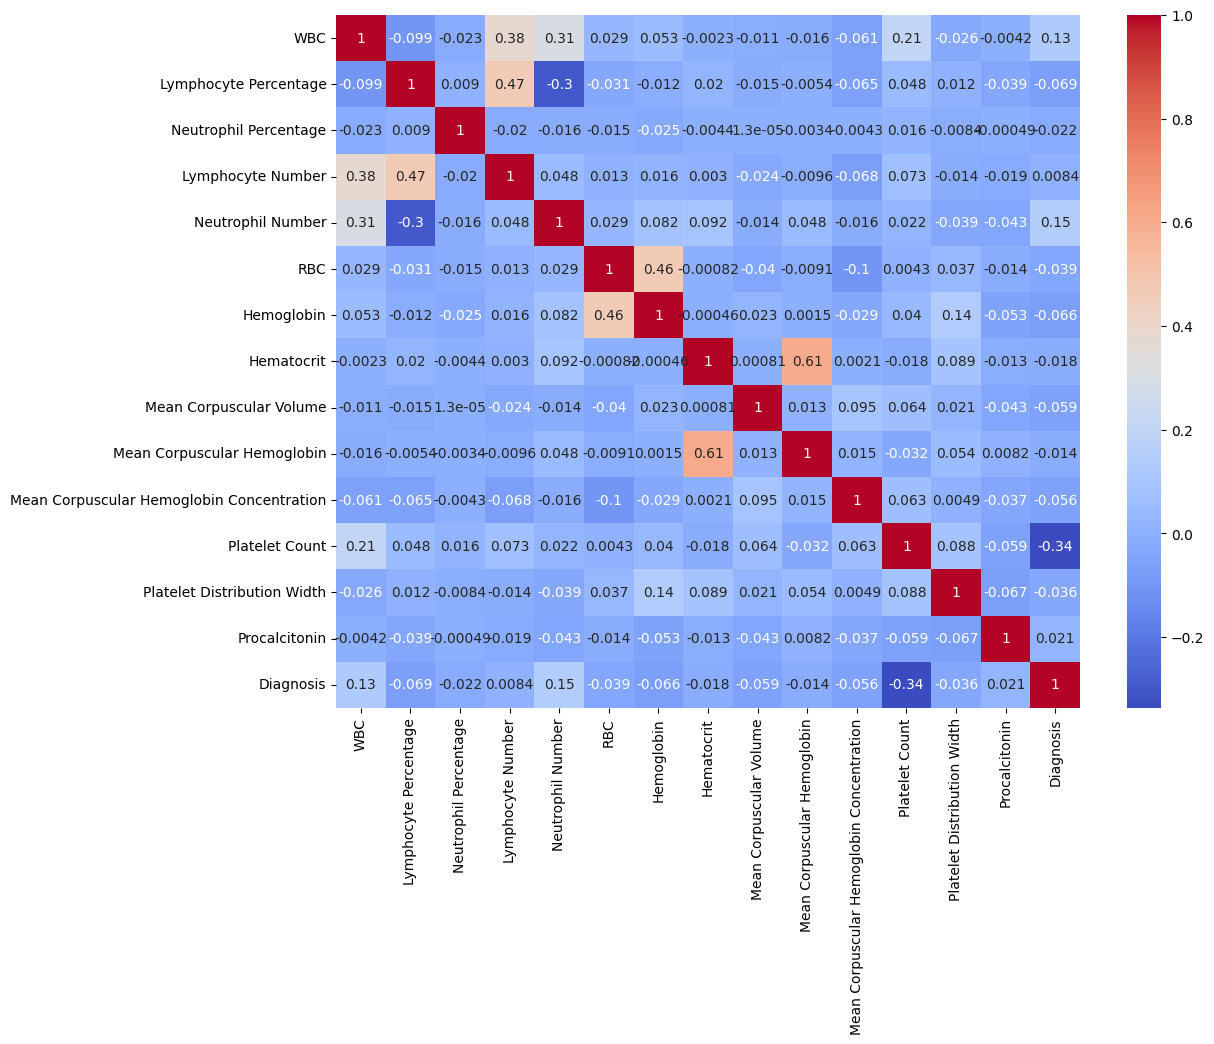

In [11]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [12]:
df.drop(['Hemoglobin','Lymphocyte Number','WBC'],axis=1,inplace=True)

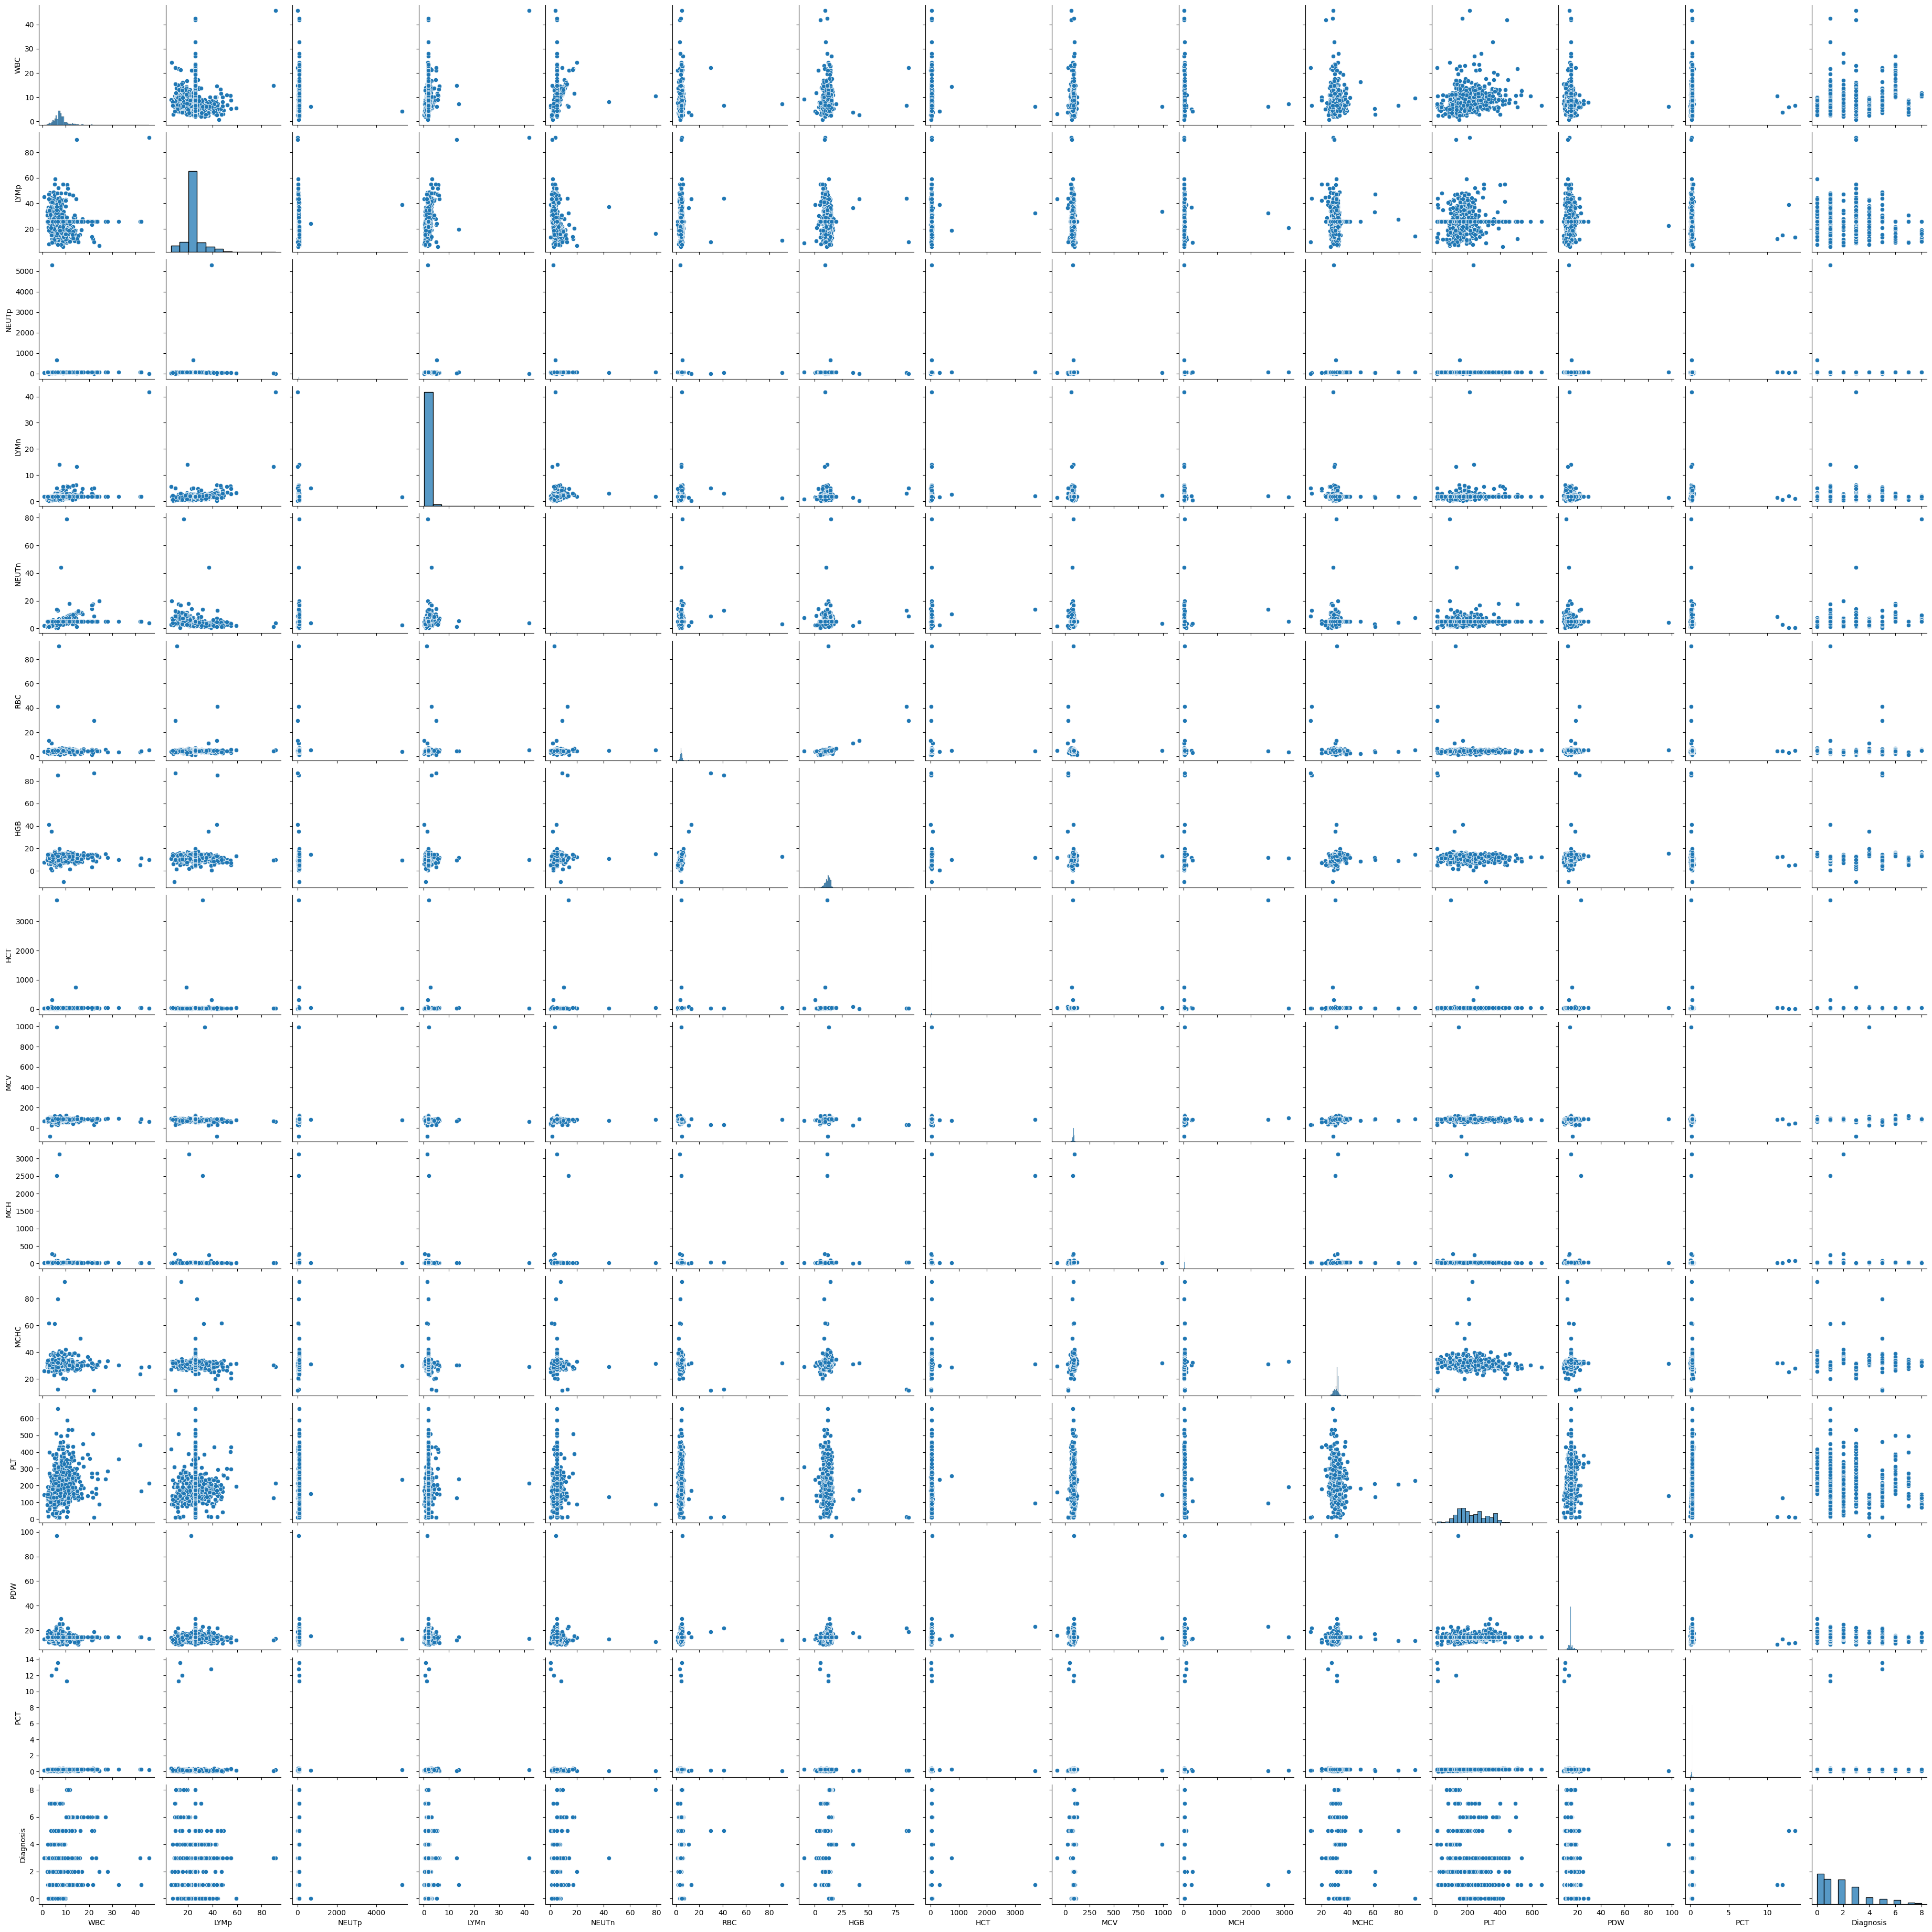

In [95]:
sns.pairplot(df)

<Axes: xlabel='Diagnosis', ylabel='Platelet Count'>

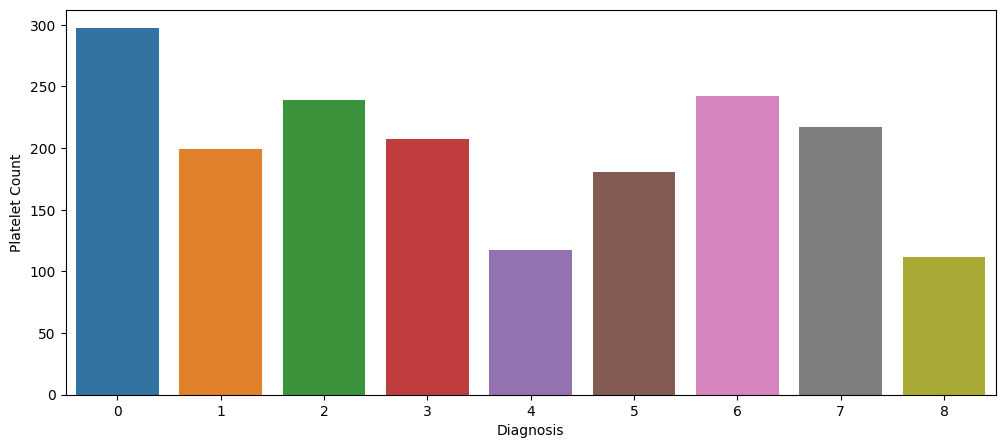

In [14]:
plt.figure(figsize=(12,5))
gb_am = df.groupby(['Diagnosis']).mean()
sns.barplot(gb_am,x=gb_am.index,y='Platelet Count')

<Axes: xlabel='Diagnosis', ylabel='Neutrophil Percentage'>

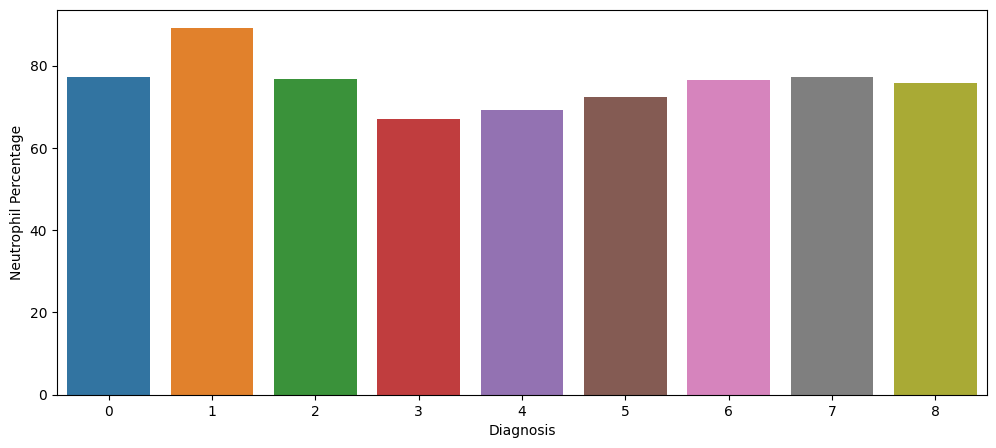

In [16]:
plt.figure(figsize=(12,5))
gb_am = df.groupby(['Diagnosis']).mean()
sns.barplot(gb_am,x=gb_am.index,y='Neutrophil Percentage')

# Insights 
- Healthy Person Have Higher Count Of Platelets Then Anemia Patients

### *Scaling Data To Get More Better Insights*

(-200.0, 200.0)

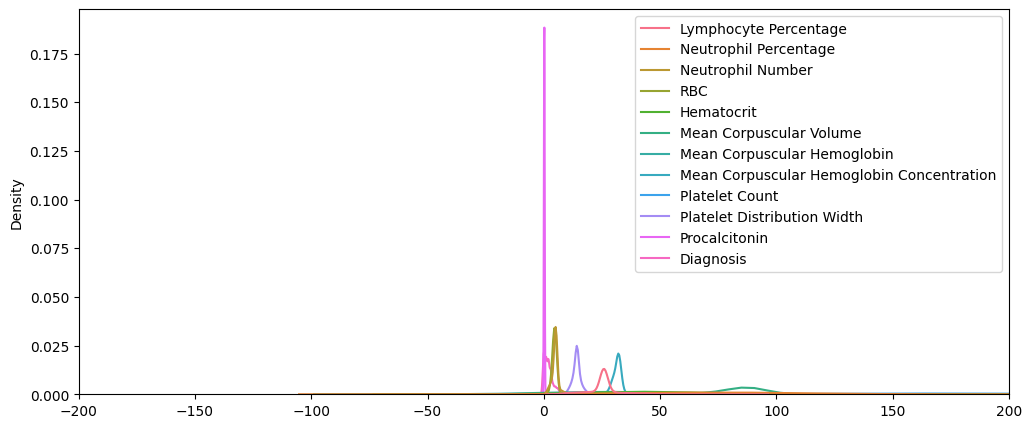

In [17]:
plt.figure(figsize=(12,5))
sns.kdeplot(df)
plt.xlim(left=-200,right=200)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('Diagnosis',axis=1))

In [19]:
df_scaled = pd.DataFrame(scaled_data,columns=df.drop('Diagnosis',axis=1).columns.to_list())

In [20]:
df_scaled.head()

Lymphocyte Percentage  Neutrophil Percentage  Neutrophil Number       RBC  \
0               2.466607              -0.185600          -0.049088 -0.688280   
1               2.352906              -0.170704           0.055399 -0.663423   
2               0.690025              -0.113827          -0.258062 -0.262159   
3               0.618961              -0.094869          -0.467036 -0.173384   
4               1.883888              -0.161224          -0.989470 -0.276363   

   Hematocrit  Mean Corpuscular Volume  Mean Corpuscular Hemoglobin  \
0   -0.209381                 0.070161                    -0.052056   
1   -0.201751                 0.088566                    -0.057455   
2   -0.149293                -0.323698                    -0.085351   
3   -0.127355                -0.290570                    -0.079952   
4    2.573771                -0.191184                    -0.073653   

   Mean Corpuscular Hemoglobin Concentration  Platelet Count  \
0                                  -0.496853       -0.440741   
1                                  -3.497704       -0.537533   
2                                  -0.678723       -0.881682   
3                                  -0.587788       -0.935455   
4                                  -0.618099        0.064728   

   Platelet Distribution Width  Procalcitonin  
0                    -0.603385      -0.131780  
1                    -0.603385      -0.146376  
2                    -0.004165      -0.175570  
3                    -1.002865      -0.204763  
4                    -0.503515      -0.058796

<Axes: ylabel='Density'>

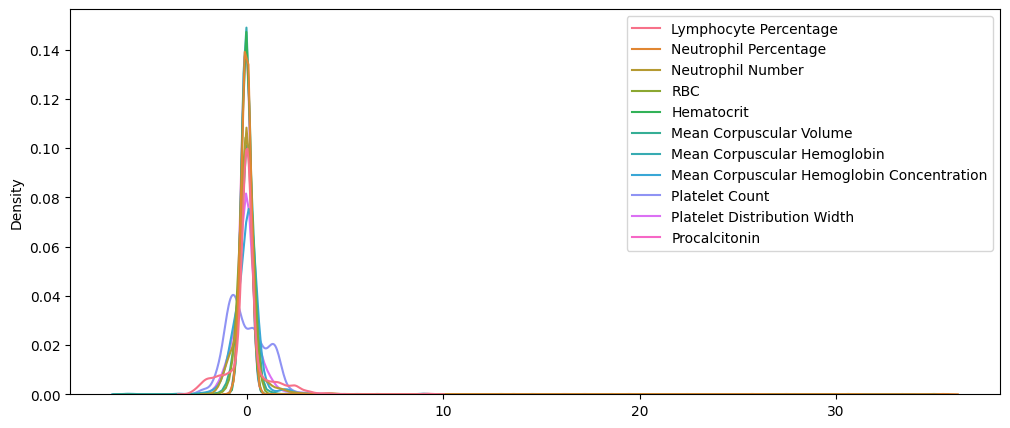

In [21]:
plt.figure(figsize=(12,5))
sns.kdeplot(df_scaled)

In [22]:
df_scaled['Diagnosis'] = df['Diagnosis']

In [23]:
df_scaled.head()

Lymphocyte Percentage  Neutrophil Percentage  Neutrophil Number       RBC  \
0               2.466607              -0.185600          -0.049088 -0.688280   
1               2.352906              -0.170704           0.055399 -0.663423   
2               0.690025              -0.113827          -0.258062 -0.262159   
3               0.618961              -0.094869          -0.467036 -0.173384   
4               1.883888              -0.161224          -0.989470 -0.276363   

   Hematocrit  Mean Corpuscular Volume  Mean Corpuscular Hemoglobin  \
0   -0.209381                 0.070161                    -0.052056   
1   -0.201751                 0.088566                    -0.057455   
2   -0.149293                -0.323698                    -0.085351   
3   -0.127355                -0.290570                    -0.079952   
4    2.573771                -0.191184                    -0.073653   

   Mean Corpuscular Hemoglobin Concentration  Platelet Count  \
0                                  -0.496853       -0.440741   
1                                  -3.497704       -0.537533   
2                                  -0.678723       -0.881682   
3                                  -0.587788       -0.935455   
4                                  -0.618099        0.064728   

   Platelet Distribution Width  Procalcitonin  Diagnosis  
0                    -0.603385      -0.131780          1  
1                    -0.603385      -0.146376          1  
2                    -0.004165      -0.175570          3  
3                    -1.002865      -0.204763          3  
4                    -0.503515      -0.058796          1

<Axes: >

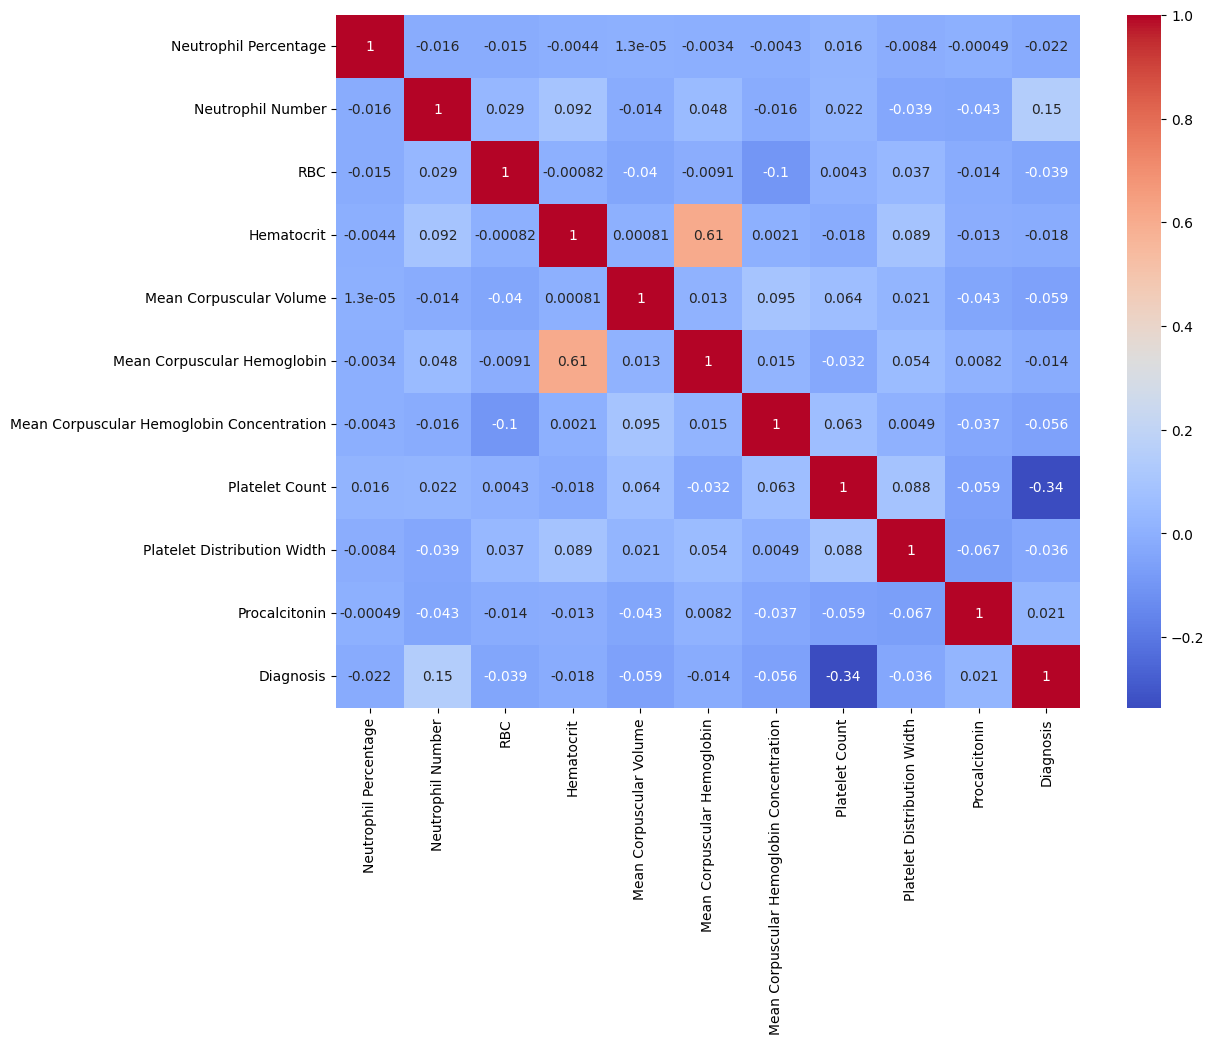

In [24]:
plt.figure(figsize=(12,9))
sns.heatmap(df_scaled.drop('Lymphocyte Percentage',axis=1).corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='Diagnosis', ylabel='RBC'>

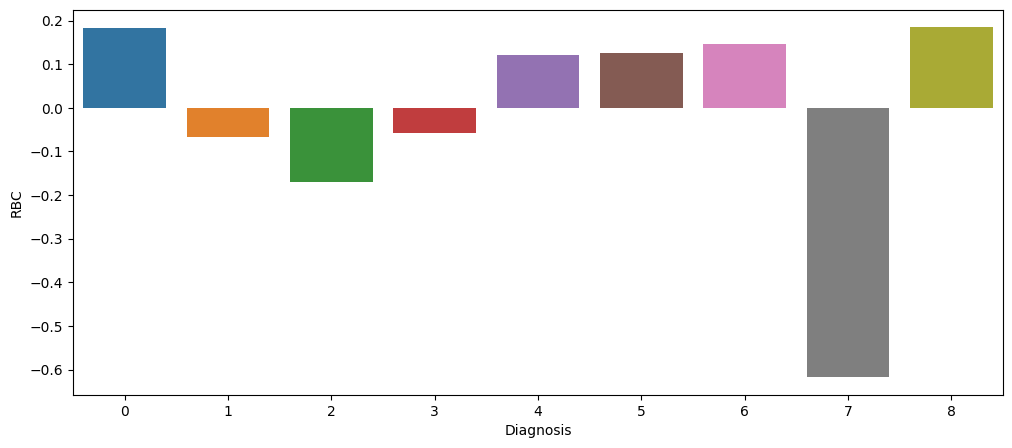

In [29]:
plt.figure(figsize=(12,5))
gb_am = df_scaled.groupby(['Diagnosis']).mean()
sns.barplot(gb_am,x=gb_am.index,y='RBC')

<Axes: xlabel='Diagnosis', ylabel='Mean Corpuscular Volume'>

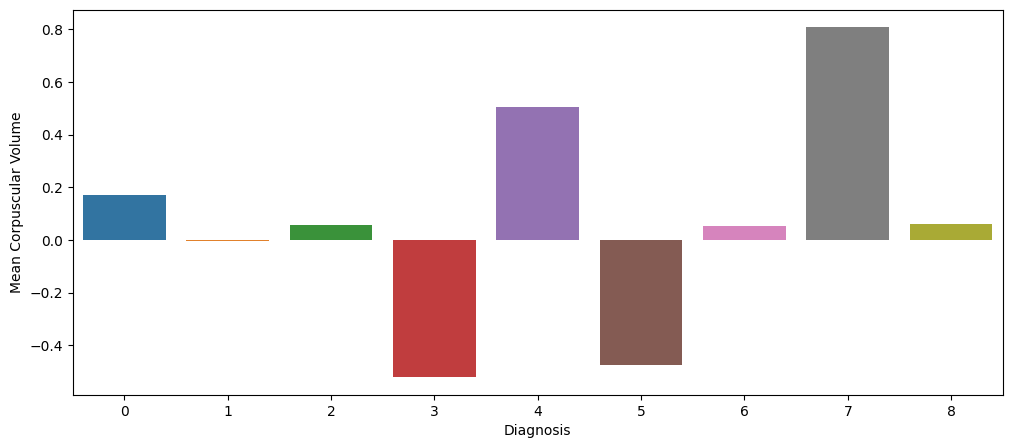

In [30]:
plt.figure(figsize=(12,5))
gb_am = df_scaled.groupby(['Diagnosis']).mean()
sns.barplot(gb_am,x=gb_am.index,y='Mean Corpuscular Volume')

# Insights 
- Anemia Of type {'Thrombocytopenia': 4,'Other microcytic anemia':5,'Leukemia': 6,'Leukemia with thrombocytopenia': 8} Have Less Affects on RBC
- Anemia Of type {'Macrocytic anemia': 7} has Higher MCV Value(Size of RBC) 
- Anemia o type { 'Iron deficiency anemia': 3, 'Other microcytic anemia': 5,} Has Less MCV Value 

# Model Training , Testing & Tuning

### Using Original Data

In [60]:
y = df['Diagnosis'] 
X = df.drop('Diagnosis',axis=1) 

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [63]:
from sklearn.metrics import classification_report
predictions = rf.predict(X_test)
print('Normal_Data:\n',classification_report(predictions,y_test))

Normal_Data:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       126
           1       0.97      0.94      0.95       101
           2       0.97      0.92      0.94        83
           3       1.00      0.97      0.98        59
           4       0.88      0.81      0.84        26
           5       1.00      1.00      1.00        19
           6       0.36      0.57      0.44         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0

    accuracy                           0.92       423
   macro avg       0.68      0.68      0.68       423
weighted avg       0.94      0.92      0.93       423



### Using Scaled Data

In [64]:
y = df_scaled['Diagnosis']
X = df_scaled.drop('Diagnosis',axis=1)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [67]:
from sklearn.metrics import classification_report
predictions = rf.predict(X_test)
print('Scaled_Data:\n',classification_report(predictions,y_test))

Scaled_Data:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       125
           1       0.94      0.95      0.94        97
           2       0.97      0.94      0.96        81
           3       0.98      0.97      0.97        58
           4       0.92      0.76      0.83        29
           5       1.00      0.86      0.93        22
           6       0.27      0.38      0.32         8
           7       0.50      0.33      0.40         3
           8       0.00      0.00      0.00         0

    accuracy                           0.91       423
   macro avg       0.72      0.68      0.69       423
weighted avg       0.92      0.91      0.91       423



## Hyperparameter Tuning

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier estimator
rfc = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X,y)
grid_search.best_score_

0.8167071984435796

In [106]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [68]:
rfc = RandomForestClassifier(bootstrap=False,max_depth=10,max_features='log2',min_samples_leaf=1,min_samples_split=2,n_estimators=100)

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2')

In [71]:
y = df['Diagnosis'] 
X = df.drop('Diagnosis',axis=1) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfc.fit(X_train,y_train)
from sklearn.metrics import classification_report
predictions = rfc.predict(X_test)
print('Normal_Data:\n',classification_report(predictions,y_test))

Normal_Data:
               precision    recall  f1-score   support

           0       0.83      0.92      0.88       118
           1       0.95      0.94      0.94        99
           2       0.99      0.89      0.93        87
           3       1.00      0.97      0.98        59
           4       0.92      0.79      0.85        28
           5       1.00      0.90      0.95        21
           6       0.36      0.67      0.47         6
           7       1.00      0.50      0.67         4
           8       0.33      1.00      0.50         1

    accuracy                           0.91       423
   macro avg       0.82      0.84      0.80       423
weighted avg       0.92      0.91      0.91       423



In [72]:
y = df_scaled['Diagnosis'] 
X = df_scaled.drop('Diagnosis',axis=1) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfc.fit(X_train,y_train)
from sklearn.metrics import classification_report
predictions = rf.predict(X_test)
print('Scaled_Data:\n',classification_report(predictions,y_test))

Scaled_Data:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       125
           1       0.94      0.95      0.94        97
           2       0.97      0.94      0.96        81
           3       0.98      0.97      0.97        58
           4       0.92      0.76      0.83        29
           5       1.00      0.86      0.93        22
           6       0.27      0.38      0.32         8
           7       0.50      0.33      0.40         3
           8       0.00      0.00      0.00         0

    accuracy                           0.91       423
   macro avg       0.72      0.68      0.69       423
weighted avg       0.92      0.91      0.91       423

